In [113]:
import numpy as np
import matplotlib.pyplot as plt

# The gyro spins lambda will form part of f, so compute the
# them beforehand
# Note: renaming lambda_dot to spin

class Properties:
    
    def __init__(self, A, B, C, CR):
        self.A = A
        self.B = B
        self.C = C
        self.CR = CR
        
    def unpack(self):
        return self.A, self.B, self.C, self.CR
    
class Conditions:
    
    def __init__(self, omega_initial=None,
                 spin = 10,
                 get_theta = lambda t: np.zeros(3),
                 get_theta_acc = lambda t: np.zeros(3)):
        self.omega_initial = omega_initial
        self.spin = spin
        self.get_theta = get_theta
        self.get_theta_acc = get_theta_acc

    def unpack(self):
        return self.omega_initial, self.spin, self.get_theta, self.get_theta_acc
    
    
def simulate(properties, conditions, T, N):
    
    A, B, C, CR = properties.unpack()
    omega_initial, spin, get_theta, get_theat_acc = conditions.unpack()
    
    def f(t, omega):
        
        theta = get_theta(t)
        theta_acc = get_theta_acc(t)

        omega_1_acc = -(1/A)*((C-B)*omega[1]*omega[2]
                              + CR*spin*theta_acc[2]
                              + CR*spin*(omega[1]*(np.cos(theta[2]) + np.sin(theta[1]))
                                         -omega[2]*(np.cos(theta[1]) + np.sin(theta[0]))))
        omega_2_acc = -(1/B)*((A-C)*omega[0]*omega[2]
                              + CR*spin*theta_acc[0]
                              + CR*spin*(omega[2]*(np.cos(theta[0]) + np.sin(theta[2]))
                                         -omega[0]*(np.cos(theta[2]) + np.sin(theta[1]))))
        omega_3_acc = -(1/C)*((B-A)*omega[0]*omega[1]
                              + CR*spin*theta_acc[1]
                              + CR*spin*(omega[0]*(np.cos(theta[1]) + np.sin(theta[0]))
                                         -omega[1]*(np.cos(theta[0]) + np.sin(theta[2]))))
                              
        return np.array([omega_1_acc, omega_2_acc, omega_3_acc])
    
    omega = np.zeros((N, 3))
    omega[0] = omega_initial

    t = np.linspace(0, T, N)
    dt = T/(N-1)

    for n in range(N-1):
        k1 = f(t[n], omega[n])
        k2 = f(t[n] + dt/2, omega[n] + k1*dt/2)
        k3 = f(t[n] + dt/2, omega[n] + k2*dt/2)
        k4 = f(t[n] + dt, omega[n] + k3*dt)

        omega[n+1] = omega[n] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*dt

    return t, omega, \
           np.array([get_theta(ti) for ti in t])
                              
def plot_simulation(t, omega, theta, name=None):
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9, 5))
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.25)

    ax0.plot(t, theta[:, 0], label=r'$\theta_1$')
    ax0.plot(t, theta[:, 1], label=r'$\theta_2$')
    ax0.plot(t, theta[:, 2], label=r'$\theta_3$')

    ax0.legend(fontsize=14)
    ax0.set_xlabel('Time t (s)', fontsize=14)
    ax0.set_ylabel(r'$\mathbf{\theta}$ (rad)', fontsize=14)

    ax1.plot(t, omega[:, 0], label=r'$\Omega_1$')
    ax1.plot(t, omega[:, 1], label=r'$\Omega_2$')
    ax1.plot(t, omega[:, 2], label=r'$\Omega_3$')
    ax1.legend(fontsize=14)
    ax1.set_xlabel('Time t (s)', fontsize=14)
    ax1.set_ylabel(r'$\mathbf{\Omega}$ (rad/s)', fontsize=14)
    
    if name is not None:
        plt.savefig('../fig/{}'.format(name), bbox_inches='tight')
    plt.show()

# Precession about a single axis

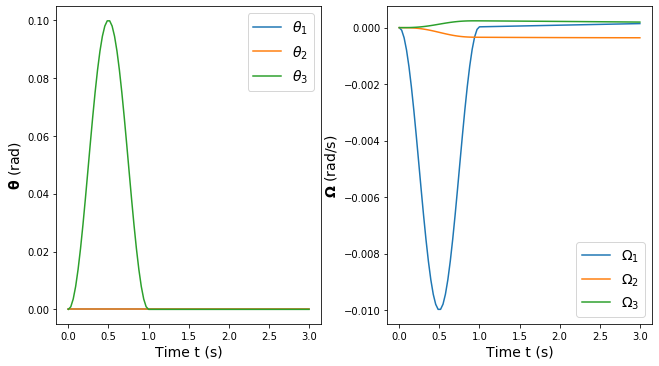

In [120]:
properties = Properties(100, 150, 200, 1)

T = 3
N = 100

omega_initial = np.array([0, 0, 0])
spin = 10

theta_T = 1
amp = 0.1

def get_theta(t):
    if t<theta_T:
        theta3 = amp*0.5*(1 - np.cos(2*np.pi*t/theta_T))
    else:
        theta3 = 0
    return np.array([0, 0, theta3])

def get_theta_acc(t):
    if t<theta_T:
        theta3_acc = (2*np.pi/theta_T)*amp*0.5*np.sin(2*np.pi*t/theta_T)
    else:
        theta3_acc = 0
    return np.array([0, 0, theta3_acc])

conditions = Conditions(omega_initial, spin, get_theta, get_theta_acc)

t, omega, theta = simulate(properties, conditions, T, N)

plot_simulation(t, omega, theta, 'cmg_controlled.png')

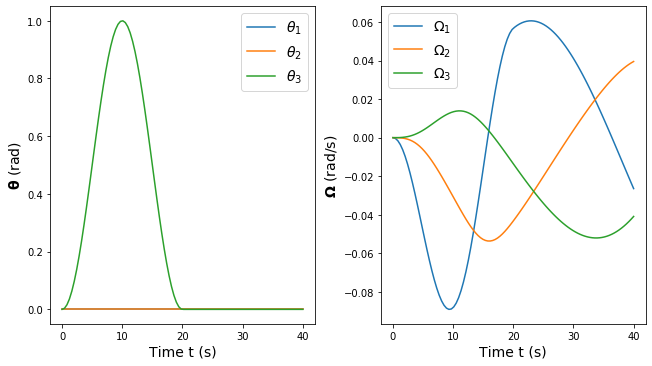

In [121]:
properties = Properties(100, 150, 200, 1)

T = 40
N = 100

omega_initial = np.array([0, 0, 0])
spin = 10

theta_T = 20
amp = 1

def get_theta(t):
    if t<theta_T:
        theta3 = amp*0.5*(1 - np.cos(2*np.pi*t/theta_T))
    else:
        theta3 = 0
    return np.array([0, 0, theta3])

def get_theta_acc(t):
    if t<theta_T:
        theta3_acc = (2*np.pi/theta_T)*amp*0.5*np.sin(2*np.pi*t/theta_T)
    else:
        theta3_acc = 0
    return np.array([0, 0, theta3_acc])

conditions = Conditions(omega_initial, spin, get_theta, get_theta_acc)

t, omega, theta = simulate(properties, conditions, T, N)

plot_simulation(t, omega, theta, 'cmg_uncontrolled.png')